<a href="https://www.kaggle.com/code/hossamrizk/your-first-step-in-cnn?scriptVersionId=149253157" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. What is the CNN?

The CNN in deep learning means Convolutional Neural Networks. It`s  is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.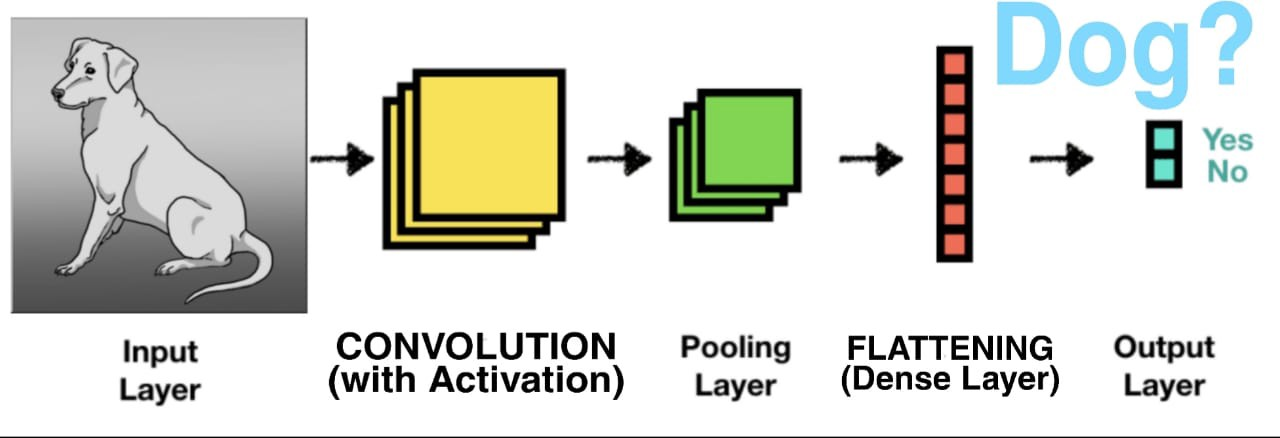

# 2. Why using CNN instead of normal deep neural network?

Lets say if we have images in size of (1000 X 1000) and there are in RGB. So that means we have 3,000,000 feature, and it is a very big number. Especialy the network will have 3 million input, so lets say the hidden layer will 1,000 unit which leads to the matrix of weights to the first hidden layer is 3,000,000 * 1,000 which will be 3 billion element. This is an enormus number, and needs to alot of very big number of data to avoid Over fiting and need to great computer capabilities.

# 3. what is the image?

To understand how CNN work you first need to understand what is the image and how it works. Any image could be 1D in gray scale case, or it may be 3D in the case of RGB. 1D array may that each pixel in the image will have a singel value. On the contrary, in the case of RGB each pixel will have 3 values: one for red, one for green and one for blue.


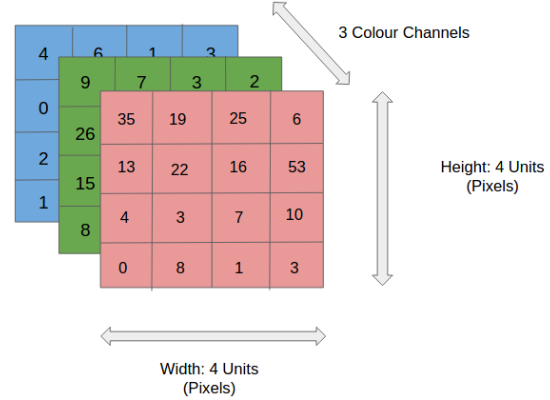



Lets talk about grayscale images so it will be more clearier. In this image show what is the convolution is, we have an input image and the kernel is the filter size here it is (3 x 3). Each pixel value is multiplied by its corresponding value, after this All pixel values are summed. This convolution passed to the second convolution and so on..
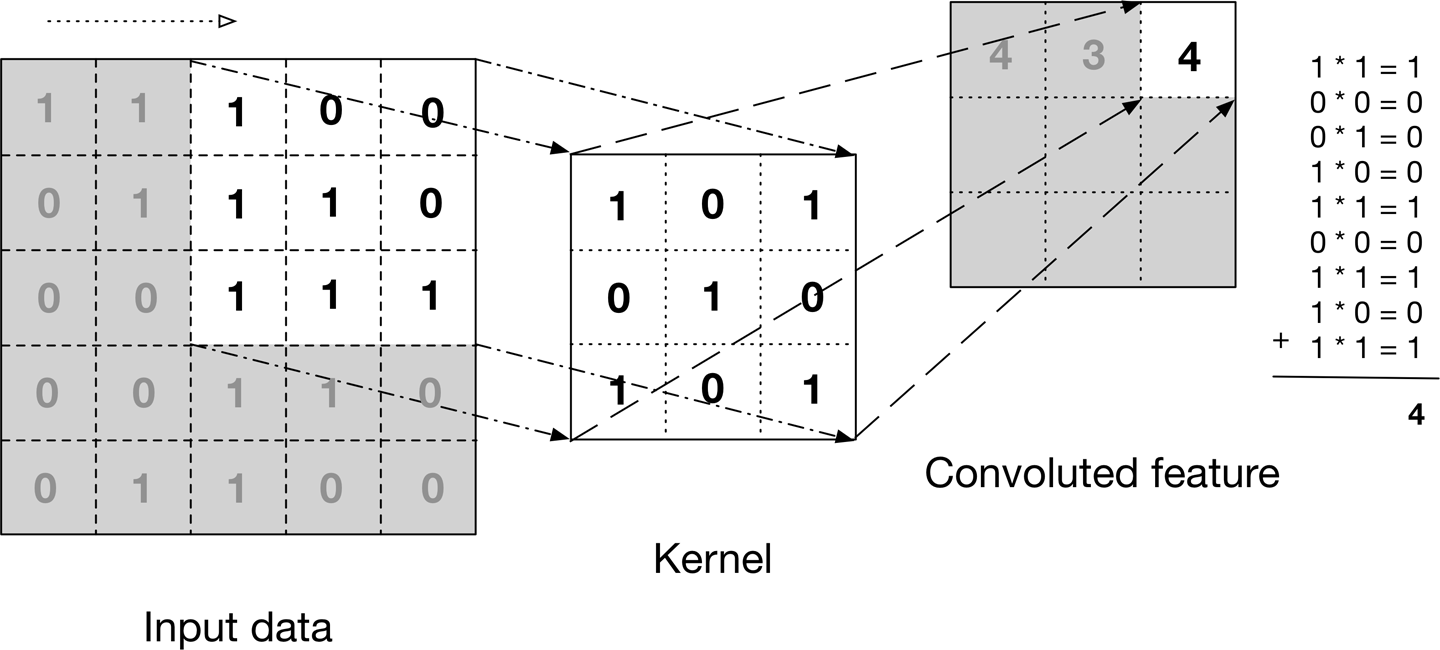

#  4. How does it works? 

In the first layer it detect the edges of the image, then in the second layer it detect corners and contours, in the last layer it collect all parts together and it tell you what is this.


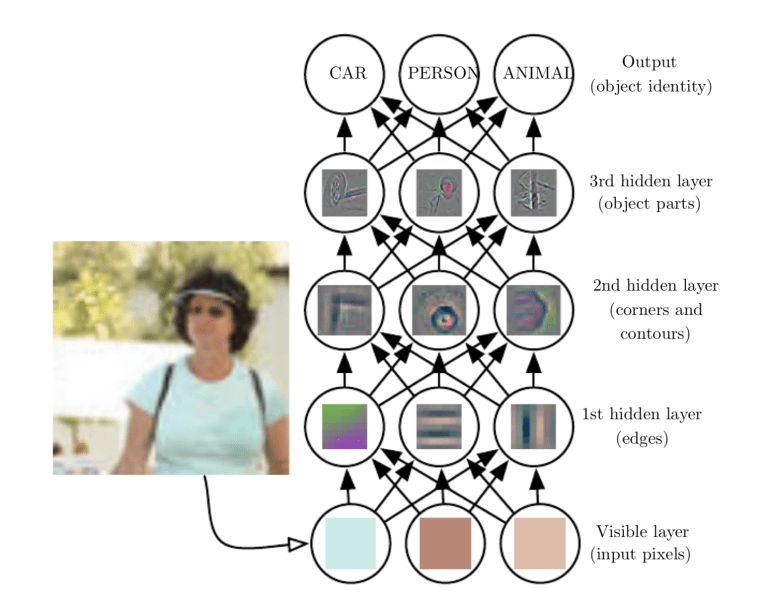

# 5. MaxPooling

MaxPooling it is the operation that calculates the maximum value in each batch of feature map. It is used for feature reductions. In this example we have (4 x 4) matrix with pool size (2 x 2). So it will split the matrix to 4 mini matrices and will take the biggest value for each batch ,then it will merge them in one final matrix,

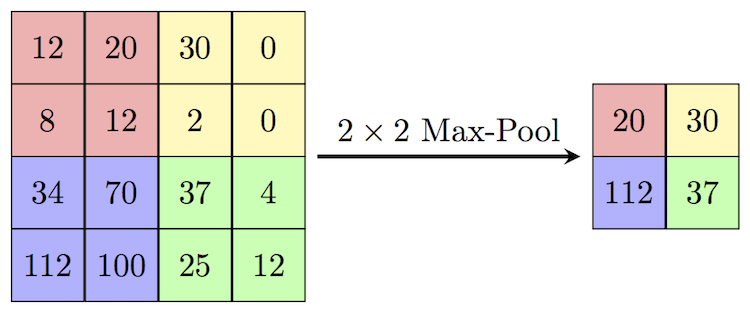

# 6. Start the project

In [1]:
import pandas as pd
train_dir='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

In [2]:
import os
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)

In [3]:
print(classes_train)

['PNEUMONIA', 'NORMAL']


In [4]:
print(classes_test)

['PNEUMONIA', 'NORMAL']


# 7. Data Augmentation


**We need to know what is the data augmentation**
Datat augmentation means generate new data from exisiting data. We do this because the performance of deep learning neural networks often improves with the amount of data available. In this example the data was small so we use this

In [5]:
# First for Training data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.


In [6]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


# 8. Callbacks

Callbacks is a method we use it to reduce over fiting and to save time.
We will use EarlyStopping to stop the training process if the accuracy dose not improved for 5 times.
ReduceLROnPlateau to minimize learning rate if the accuracy dose not improved for 2 times 


In [7]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# 9. Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization

model=Sequential() 


model.add(Conv2D(32,(5,5),activation='relu',input_shape=(1000,1000,3)))
# 16 is the number of filters, (3,3) it the filter size,acitivation is the activation function and input_shape is the size of the image 
model.add(MaxPooling2D(5,5))
#(2,2) is the pool size 

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
# 128 is the number of the hideen layers
#model.add(Dropout(0.5))
# Dropout is a function that reducess over fiting by removing random layers every epoch

model.add(Dense(1,activation='sigmoid'))
# 1 the number of outputs 


# Complie the model

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 996, 996, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 195, 195, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [11]:
callbacks = [earlystop, learning_rate_reduction]

# 10. Fit

In [12]:
model.fit(
    train_generator, 
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
5/5 [==============================] - 41s 7s/step - loss: 0.9255 - accuracy: 0.5473 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 35s 7s/step - loss: 0.7024 - accuracy: 0.4865 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 35s 7s/step - loss: 0.6824 - accuracy: 0.6081 - val_loss: 0.6468 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 36s 7s/step - loss: 0.6546 - accuracy: 0.6824 - val_loss: 0.5542 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 36s 7s/step - loss: 0.6066 - accuracy: 0.7027 - val_loss: 0.5056 - val_accuracy: 0.8000
Epoch 6/10
5/5 [==============================] - 36s 7s/step - loss: 0.5400 - accuracy: 0.7770 - val_loss: 0.2394 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 35s 7s/step - loss: 0.3767 - accuracy: 0.8446 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==================

# 11. Accuracy

In [13]:
losses = pd.DataFrame(model.history.history)

In [14]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.925486,0.547297,0.691963,0.5,0.001
1,0.702382,0.486486,0.684439,0.5,0.001
2,0.682410,0.608108,0.646773,1.0,0.001
3,0.654646,0.682432,0.554228,0.9,0.001
4,0.606606,0.702703,0.505597,0.8,0.001


<AxesSubplot:>

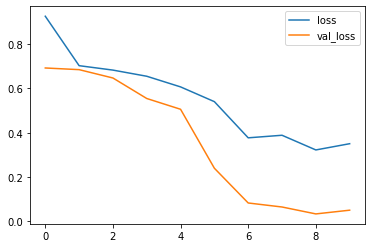

In [15]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

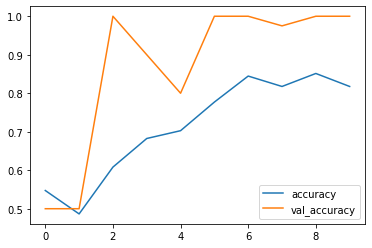

In [16]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

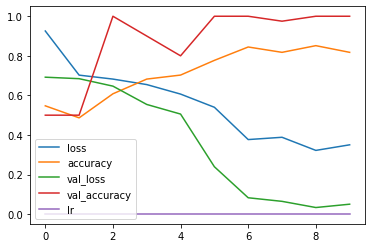

In [17]:
losses.plot()

In [18]:
model.evaluate(test_generator)

2/2 [==============================] - 2s 291ms/step - loss: 0.0501 - accuracy: 1.0000


[0.05012734606862068, 1.0]

# 12. predictions

In [19]:
model_pred=model.predict(test_generator)

In [20]:
print(model_pred)

[[8.53752553e-01]
 [2.41482956e-03]
 [9.62520182e-01]
 [1.43173744e-03]
 [2.86591835e-02]
 [3.25901841e-04]
 [9.83061910e-01]
 [8.55124556e-03]
 [9.98152673e-01]
 [1.51468604e-03]
 [9.92177665e-01]
 [9.16691482e-01]
 [4.06569074e-04]
 [2.03769375e-03]
 [9.27306771e-01]
 [8.29902813e-02]
 [9.85840917e-01]
 [1.32760883e-03]
 [9.65055287e-01]
 [9.67246950e-01]
 [6.28894746e-01]
 [9.52058136e-01]
 [1.53731016e-04]
 [9.18589830e-02]
 [9.69711781e-01]
 [4.51491401e-03]
 [1.44779799e-04]
 [9.86192644e-01]
 [9.12686229e-01]
 [2.55161733e-03]
 [9.69478071e-01]
 [9.15456712e-01]
 [9.53533590e-01]
 [3.55697982e-03]
 [9.40200931e-04]
 [2.10202232e-01]
 [9.52090979e-01]
 [9.24734116e-01]
 [1.08060636e-01]
 [8.65907467e-04]]


In [21]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Let`s check the model

In [22]:
class_names=['NORMAL','PNEUMONIA']

In [23]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    images, labels = test_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()

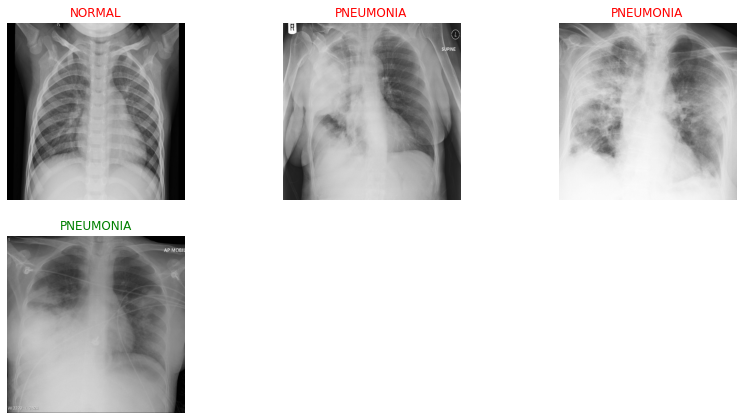

In [24]:
plot_prediction(test_generator,5)

**The green clolr means the person was not sick and  model predict it not sick so this correct** 


**the red color means model predict it wrong**